# Handwritten Digit Recognition

## Imports

In [44]:
import tensorflow as tf
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from sklearn.model_selection import train_test_split

import os

## Loading the MNIST dataset

In [45]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [46]:
# Verifying dataset values
print(f'Shape of an image: {x_train[0].shape}')
print(f'Max pixel value: {x_train.max()}')
print(f'Min pixel value: {x_train.min()}')
print(f'Classes: {np.unique(y_train)}')

Shape of an image: (28, 28)
Max pixel value: 255
Min pixel value: 0
Classes: [0 1 2 3 4 5 6 7 8 9]


In [47]:
x_train = x_train/255
x_test = x_test/255 

num_classes = 10

train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes) #one hot encoding for the training set
test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes) #one hot encdoing for the testing set

print(y_train[0])
print(train_one_hot[0])

train_size = x_train.shape[0]
test_size = x_test.shape[0]

print(f'Max pixel value: {x_train.max()}')
print(f'Min pixel value: {x_train.min()}')
print(f'Train size: {train_size}, Test size: {test_size}')
print(f'Train data shape: {x_train.shape}, Test data shape: {x_test.shape}')
print(f'Train label shape: {train_one_hot.shape}, Test label shape: {test_one_hot.shape}')

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Max pixel value: 1.0
Min pixel value: 0.0
Train size: 60000, Test size: 10000
Train data shape: (60000, 28, 28), Test data shape: (10000, 28, 28)
Train label shape: (60000, 10), Test label shape: (10000, 10)


## Model Training

In [48]:
input_shape = [28, 28, 1]

# Reshaping the data
x_train = x_train.reshape([-1]+input_shape)
x_test = x_test.reshape([-1]+input_shape)

print(f'Train data shape: {x_train.shape}, Test data shape: {x_test.shape}')

Train data shape: (60000, 28, 28, 1), Test data shape: (10000, 28, 28, 1)


In [49]:
tf.keras.backend.clear_session()


inputs = tf.keras.Input(shape=input_shape)
x = tf.keras.layers.Conv2D(2, (3,3), strides=(1,1), padding='same', activation='relu',)(inputs)
x = tf.keras.layers.AveragePooling2D(strides=(1,1))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
 
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)


model = tf.keras.Model(inputs=inputs, outputs=outputs, name='cnn')

optimizer = tf.keras.optimizers.Adam(
	learning_rate=0.001,
	beta_1=0.9,
	beta_2=0.999,
	epsilon=1e-07
)

model.compile(
	loss='categorical_crossentropy',
	optimizer=optimizer,
	metrics=['accuracy']
)

model.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 2)         20        
                                                                 
 average_pooling2d (AverageP  (None, 27, 27, 2)        0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 1458)              0         
                                                                 
 dense (Dense)               (None, 100)               145900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                               

In [50]:
tf.keras.utils.plot_model(model, "cnn_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [51]:
batch_size = 128
epochs = 100

# Early Stopping callback function
earlystopping = tf.keras.callbacks.EarlyStopping(
	monitor='val_accuracy',
	min_delta=0,
	patience=6.5,
	verbose=1,
	mode='max',
	restore_best_weights=True
)



# Starting the training
history = model.fit(x_test, test_one_hot, epochs=epochs, batch_size=batch_size, validation_split=.3, callbacks=[earlystopping])

Epoch 1/100
55/55 [==============================] - 2s 21ms/step - loss: 0.9520 - accuracy: 0.7561 - val_loss: 0.3726 - val_accuracy: 0.8893
Epoch 2/100
55/55 [==============================] - 1s 17ms/step - loss: 0.3566 - accuracy: 0.8951 - val_loss: 0.2624 - val_accuracy: 0.9267
Epoch 3/100
55/55 [==============================] - 1s 16ms/step - loss: 0.2737 - accuracy: 0.9196 - val_loss: 0.2354 - val_accuracy: 0.9327
Epoch 4/100
55/55 [==============================] - 1s 16ms/step - loss: 0.2353 - accuracy: 0.9299 - val_loss: 0.2009 - val_accuracy: 0.9423
Epoch 5/100
55/55 [==============================] - 1s 17ms/step - loss: 0.2029 - accuracy: 0.9380 - val_loss: 0.1895 - val_accuracy: 0.9360
Epoch 6/100
55/55 [==============================] - 1s 18ms/step - loss: 0.1743 - accuracy: 0.9460 - val_loss: 0.1946 - val_accuracy: 0.9390
Epoch 7/100
55/55 [==============================] - 1s 18ms/step - loss: 0.1559 - accuracy: 0.9511 - val_loss: 0.1907 - val_accuracy: 0.9433
Epoch 

In [52]:
history.history

{'loss': [0.9520154595375061,
  0.3566489815711975,
  0.27373236417770386,
  0.23534612357616425,
  0.2028816044330597,
  0.17430968582630157,
  0.15586955845355988,
  0.13535302877426147,
  0.1180863156914711,
  0.106942318379879,
  0.09524675458669662,
  0.08491674810647964,
  0.07378814369440079,
  0.06581425666809082,
  0.059429727494716644,
  0.05041754990816116,
  0.04481454938650131,
  0.04326663166284561,
  0.035845231264829636,
  0.032132044434547424,
  0.02642640843987465,
  0.022804178297519684,
  0.022253679111599922,
  0.017605464905500412,
  0.017143631353974342,
  0.01390867866575718],
 'accuracy': [0.7561428546905518,
  0.8951428532600403,
  0.9195713996887207,
  0.9298571348190308,
  0.9380000233650208,
  0.9459999799728394,
  0.9511428475379944,
  0.9594285488128662,
  0.9637143015861511,
  0.9675714373588562,
  0.9710000157356262,
  0.9747142791748047,
  0.9795714020729065,
  0.9811428785324097,
  0.9831428527832031,
  0.9872857332229614,
  0.9888571500778198,
  0.98

## Plotting the Learning Curve

<AxesSubplot:>

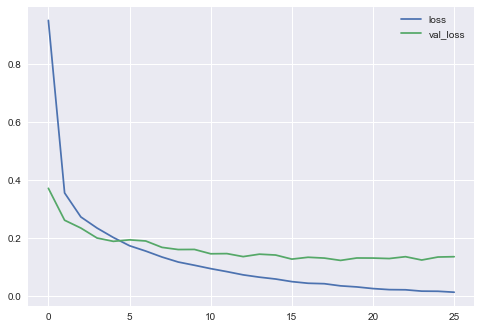

In [53]:
res = pd.DataFrame(history.history)
res[['loss','val_loss']].plot()

<AxesSubplot:>

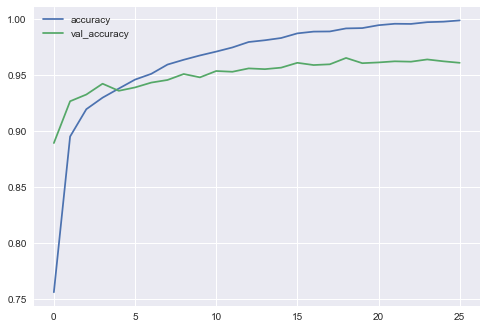

In [54]:
res[['accuracy','val_accuracy']].plot()

## Model Evaluation

In [55]:
scores = model.evaluate(x_test, test_one_hot, verbose=1)
names = model.metrics_names

for i in range(len(scores)):
  print(f'{names[i]}: {scores[i]:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0574 - accuracy: 0.9853
loss: 0.0574
accuracy: 0.9853


In [56]:
model.save("raw/basicdigitOCR.h5")

In [57]:
loaded_model = tf.keras.models.load_model("raw/basicdigitOCR.h5")
loaded_model.evaluate(x_test, test_one_hot, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.0574 - accuracy: 0.9853


[0.05739057436585426, 0.9853000044822693]

In [58]:
model.predict(x_test[0].reshape(-1,28,28))

1/1 [==============================] - 0s 83ms/step


array([[1.0403159e-07, 1.6945786e-10, 4.7758222e-06, 1.0681335e-03,
        2.6134239e-11, 1.5226439e-08, 9.5546252e-14, 9.9892682e-01,
        2.4904752e-08, 4.3599627e-08]], dtype=float32)

In [59]:
prediction = model.predict(x_test)


print(
    f'sum: {np.sum(prediction, axis=1)}\n'
    f'predict index: {np.argmax(prediction, axis=1)}'
)

313/313 [==============================] - 1s 4ms/step
sum: [0.9999999  1.         0.9999999  ... 0.99999994 1.0000001  1.        ]
predict index: [7 2 1 ... 4 5 6]
